In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random
rnd.seed(42) # Change seed value to randomise

In [2]:
n = 400  # Number of Customer n=20 n1=400 n2=100 n3=1000 n4=20
xc = rnd.rand(n) * 200 # x-coordinate
yc = rnd.rand(n) * 100 # y-coordinate
m = 5  # Numebr of Facility m=5 m1=50 m2=25 m*=10 m3=100 m4=10
xf = rnd.rand(m) * 200 # x-coordiante 
yf = rnd.rand(m) * 100 # y-coordiante

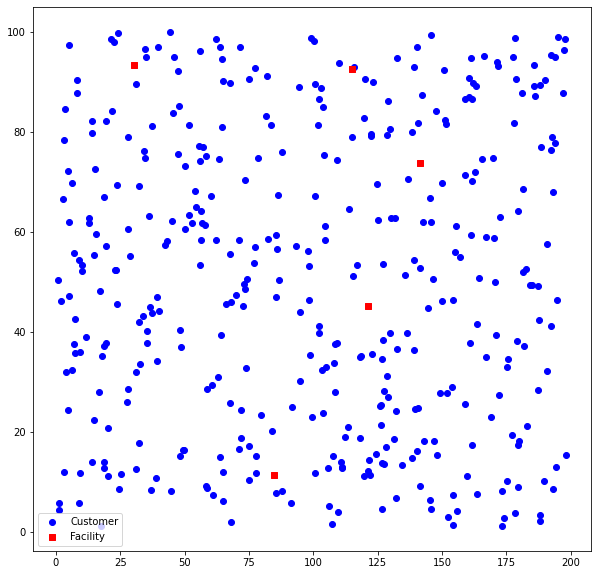

In [3]:
fig=plt.subplots(figsize=(10,10))
plt.scatter(xc[0:], yc[0:], c='b', label = 'Customer') # Customer
plt.scatter(xf[0:], yf[0:], c='r', marker='s', label = 'Facility') # Facility
plt.legend()
plt.show();

In [4]:
I = [i for i in range(0, n)] # Customer 
J = [i for i in range(0, m)] # Facility
h = {i: rnd.randint(1, 10) for i in I} # Demand of Customer
A = [(i, j) for i in I for j in J] # 2-D cartesian product
f = {j: 100 for j in J} # Fixed setup cost of Facility
c = {(i, j): 1*np.hypot(xc[i]-xf[j], yc[i]-yf[j]) for (i, j) in A} # Cost to reach customer from Facility

In [5]:
from gurobipy import Model, GRB, quicksum

In [6]:
%%capture
mdl = Model('UFLP');

In [7]:
x = mdl.addVars(J, vtype = GRB.BINARY)
y = mdl.addVars(A, vtype = GRB.CONTINUOUS)

In [8]:
mdl.ModelSense = GRB.MINIMIZE # Minimisation model
mdl.setObjective(quicksum(f[j]*x[j] for j in J) + quicksum(h[i]*c[i,j]*y[i,j] for i,j in A)) # Cost Function
mdl.addConstrs(quicksum(y[i,j] for j in J) == 1 for i in I);
mdl.addConstrs(y[i,j] <= x[j] for i,j in A);


In [9]:
mdl.optimize() # Solution cost: 3818.43 (varies with changing seed value)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2400 rows, 2005 columns and 6000 nonzeros
Model fingerprint: 0x739bf933
Variable types: 2000 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.05s
Presolved: 2400 rows, 2005 columns, 6000 nonzeros
Variable types: 2000 continuous, 5 integer (5 binary)
Found heuristic solution: objective 70923.942646

Root relaxation: cutoff, 8 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0      70923.9426 70923.9426  0.00%     -    0s

Explored 1 nodes (8 simplex iterations) in 0.19 seconds (0.01 work units)
Thread count w

In [10]:
assignment = [a for a in A if y[a].X > 0.0]

c:\users\titan 8\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


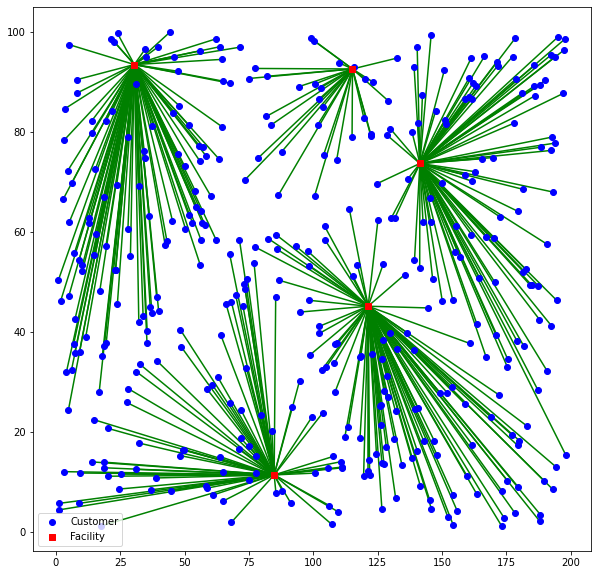

In [11]:
fig=plt.subplots(figsize=(10,10))
for i, j in assignment:
    plt.plot([xc[i], xf[j]], [yc[i], yf[j]], c='g', zorder=0)
plt.scatter(xc[0:], yc[0:], c='b', label = 'Customer')
plt.scatter(xf[0:], yf[0:], c='r',marker='s', label = 'Facility')
plt.legend()
plt.show();

In [12]:
max_disruption = 10000 # High penalty for disrupted facility
I = [i for i in range(0, n)] # Customer
J = [i for i in range(0, m)] # Facility
h = {i: rnd.randint(1, 10) for i in I} # Demand of Customer
A = [(i, j) for i in I for j in J] # 2-D cartesian product
f = {j: 100 for j in J} # Fixed setup cost of Facility
c = {(i, j): 1*np.hypot(xc[i]-xf[j], yc[i]-yf[j]) for (i, j) in A} # Cost to reach customer from Facility
p = {j: rnd.choice(np.array((0, max_disruption // 4, max_disruption // 2, max_disruption)), p=[0.5, 0.25, 0.15, 0.1]) for j in J}

In [13]:
p # Penalty to Facility (Although used particular fixed values, any probability distribution function can be used instead)

{0: 5000, 1: 0, 2: 10000, 3: 2500, 4: 0}

In [14]:
%%capture
mdl = Model('UFLP');

In [15]:
x = mdl.addVars(J, vtype = GRB.BINARY)
y = mdl.addVars(A, vtype = GRB.CONTINUOUS)

In [16]:
mdl.ModelSense = GRB.MINIMIZE # Minimization model
mdl.setObjective(quicksum(f[j]*x[j] for j in J) + quicksum(h[i]*c[i,j]*y[i,j] for i,j in A) + quicksum(p[j]*x[j] for j in J))

In [17]:
mdl.addConstrs(quicksum(y[i,j] for j in J) == 1 for i in I);
mdl.addConstrs(y[i,j] <= x[j] for i,j in A);

In [18]:
mdl.optimize() # Solution cost: 5180.93 (varies with changing seed value)

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2400 rows, 2005 columns and 6000 nonzeros
Model fingerprint: 0x2d684231
Variable types: 2000 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.04s
Presolved: 2400 rows, 2005 columns, 6000 nonzeros
Variable types: 2000 continuous, 5 integer (5 binary)
Found heuristic solution: objective 86043.206296

Root relaxation: objective 7.792890e+04, 133 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    77928.900488 77928.9005  0.00%     -    0s

Explored 1 nodes (133 simplex iterations) in 0.14 seconds (0.01 work u

In [19]:
assignment = [a for a in A if y[a].X > 0.0]

In [20]:
assignment # (i, j) == (Customer, Facility)

[(0, 4),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 4),
 (5, 1),
 (6, 1),
 (7, 3),
 (8, 0),
 (9, 3),
 (10, 1),
 (11, 0),
 (12, 0),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 4),
 (17, 3),
 (18, 3),
 (19, 1),
 (20, 0),
 (21, 1),
 (22, 4),
 (23, 4),
 (24, 4),
 (25, 0),
 (26, 1),
 (27, 0),
 (28, 3),
 (29, 4),
 (30, 3),
 (31, 1),
 (32, 1),
 (33, 3),
 (34, 3),
 (35, 0),
 (36, 4),
 (37, 1),
 (38, 0),
 (39, 4),
 (40, 4),
 (41, 0),
 (42, 1),
 (43, 0),
 (44, 1),
 (45, 0),
 (46, 1),
 (47, 3),
 (48, 3),
 (49, 4),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 0),
 (54, 3),
 (55, 0),
 (56, 4),
 (57, 1),
 (58, 4),
 (59, 4),
 (60, 4),
 (61, 1),
 (62, 0),
 (63, 4),
 (64, 1),
 (65, 3),
 (66, 4),
 (67, 0),
 (68, 4),
 (69, 0),
 (70, 3),
 (71, 1),
 (72, 4),
 (73, 0),
 (74, 0),
 (75, 0),
 (76, 3),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 0),
 (81, 0),
 (82, 4),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 3),
 (87, 3),
 (88, 0),
 (89, 0),
 (90, 1),
 (91, 0),
 (92, 3),
 (93, 3),
 (94, 0),
 (95, 3),
 (96, 3),
 (97, 4),
 (98, 1),
 (99, 1),
 (100, 1),

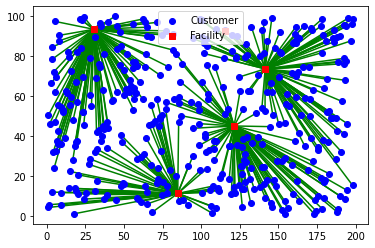

In [21]:
for i, j in assignment:
    plt.plot([xc[i], xf[j]], [yc[i], yf[j]], c='g', zorder=0)
plt.scatter(xc[0:], yc[0:], c='b', label = 'Customer')
plt.scatter(xf[0:], yf[0:], c='r',marker='s', label = 'Facility')
plt.legend()
plt.show();